Checking for basic validations/asking basic questions and answering them using visualizations on a small shopping dataset. Dataset available here: https://www.kaggle.com/datasets/zubairamuti/shopping-behaviours-dataset

To see all the plots, click "Run All". This will run all of the necessary code. Explanations of what we see on each graph are below each code block.

In [ ]:
#install all packages needed
%pip install pandas matplotlib seaborn

Alright, we just installed all the Python packages we need. Next, we'll be reading in and checking the cleanliness of the data:

In [3]:
import pandas as pd
shop_data = pd.read_csv('shopping_behavior_updated.csv')
shop_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#general info
print("general info:")
print(shop_data.info())
print("\n")

#checking for NaNs
print("NaNs in each column:")
print(shop_data.isna().sum())
print("\n")

#checking for duplicates
print("duplicate rows:")
print(shop_data.duplicated().sum())
print("\n")

#checking data types
print("data types:")
print(shop_data.dtypes)
print("\n")

general info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         39

The two blocks above let us see the structure of the data, as well as make sure it's clean and doesn't contain duplicates. Luckily, it doesn't, so we're good to get started! 

Now, let's take a look at the scope of the data and how it varies.

For our first check, let's see how biased our data is by seeing how the distributions of our samples vary.

Location distribution:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Ha

Text(0.5, 1.0, 'Location Distribution')

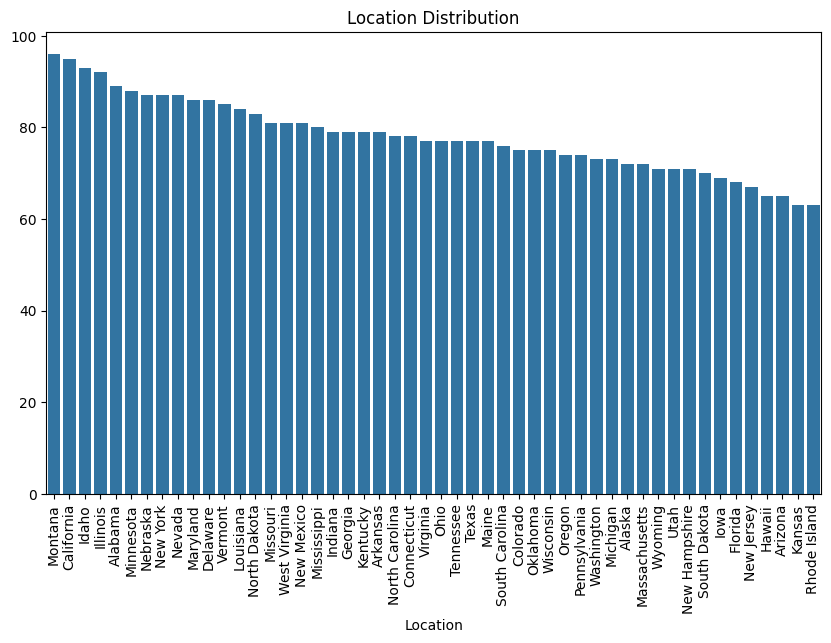

In [ ]:
#check location distribution
print("Location distribution:")
print(shop_data['Location'].value_counts())

#create a graph of location distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=shop_data['Location'].value_counts().index, y=shop_data['Location'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Location Distribution')

Okay, we've got a pretty good distribution across all 50 states, though Montana is a little overrepresented! Something to note: we've got a similar amount of samples from each state, but not all states have similar populations, so proportions may be off. Let's check age distribution next.

Text(0.5, 1.0, 'Location Distribution')

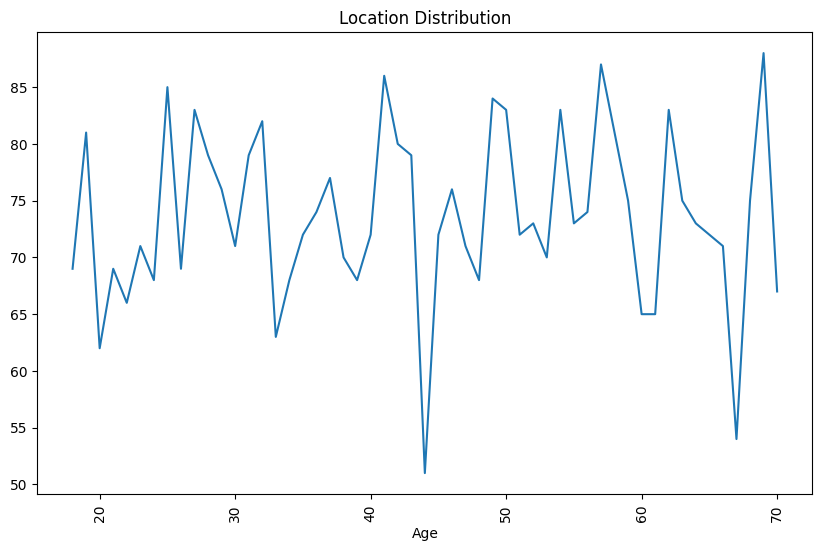

In [33]:
#create a graph of age distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(x=shop_data['Age'].value_counts().index, y=shop_data['Age'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Location Distribution')

Though our age distribution isn't entirely even, it's still spread out pretty well over the age range! Though there are spikes and valleys, these shouldn't be too worrying - it doesn't matter if there's very few people at age 44 if we have people at age 43 and 46 to balance it out. Let's check the bias when it comes to season information.

Text(0.5, 1.0, 'Location Distribution')

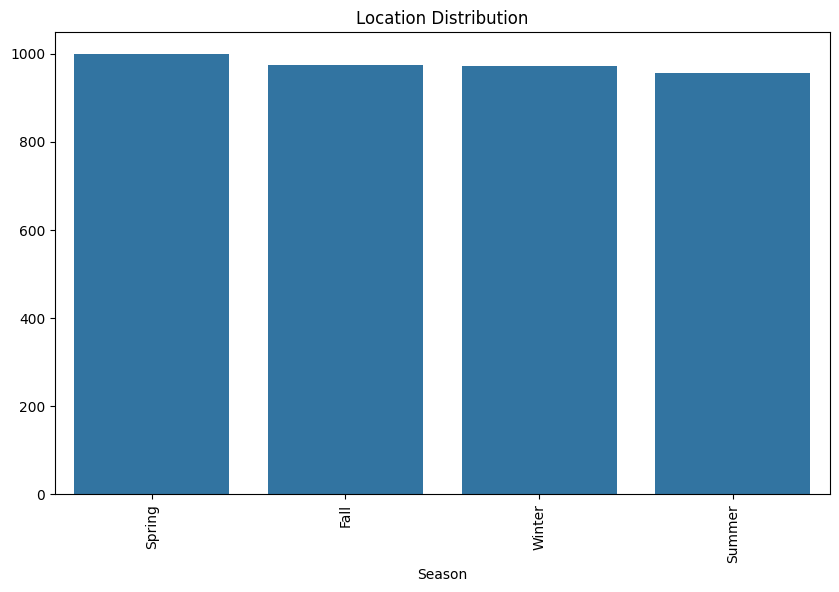

In [34]:
#create a graph of season distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=shop_data['Season'].value_counts().index, y=shop_data['Season'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Location Distribution')

Season information looks pretty even! Let's move on to asking our questions. Here, I'm asking question 1: How does gender affect color preference?
I'm using multiple donut/pie charts to ask this.

      Customer ID  Age  Gender Item Purchased     Category  \
2652         2653   23  Female         Shorts     Clothing   
2653         2654   67  Female         Blouse     Clothing   
2654         2655   23  Female           Coat    Outerwear   
2655         2656   26  Female     Sunglasses  Accessories   
2656         2657   52  Female         Shorts     Clothing   

      Purchase Amount (USD)   Location Size     Color  Season  Review Rating  \
2652                     20   Maryland    L      Cyan  Summer            3.3   
2653                     36  Wisconsin    L  Lavender    Fall            4.8   
2654                     70      Idaho    S      Pink    Fall            4.1   
2655                     83    Wyoming    M      Gray  Summer            3.4   
2656                     76    Indiana    L    Yellow  Winter            3.6   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
2652                  No  2-Day Shipping               No            

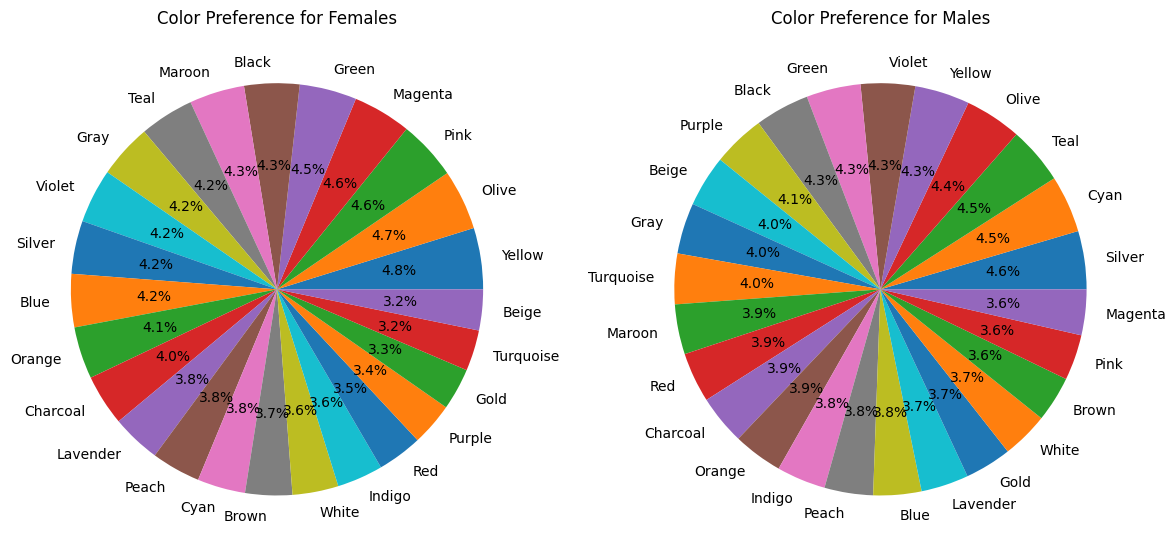

In [27]:
#filtering out rows based on gender
filtered_data_female = shop_data[shop_data['Gender'] == 'Female']
print(filtered_data_female.head())
filtered_data_male = shop_data[shop_data['Gender'] == 'Male']
print(filtered_data_male.head())
print(filtered_data_female['Color'].value_counts())

#make plot with two donut charts for color preference for each side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot female color preference pie chart
ax1.pie(filtered_data_female['Color'].value_counts().values, labels=filtered_data_female['Color'].value_counts().index, autopct='%1.1f%%')
ax1.set_title('Color Preference for Females')

# plot male color preference pie chart
ax2.pie(filtered_data_male['Color'].value_counts().values, labels=filtered_data_male['Color'].value_counts().index, autopct='%1.1f%%')
ax2.set_title('Color Preference for Males')

plt.tight_layout()
plt.show()

Alright! We can see there's not really one color that stands out more in either gender, which is interesting. Next, I'm asking question 2: How do prices change based on size, per each type of clothing? I'm asking this using a stacked line graph.

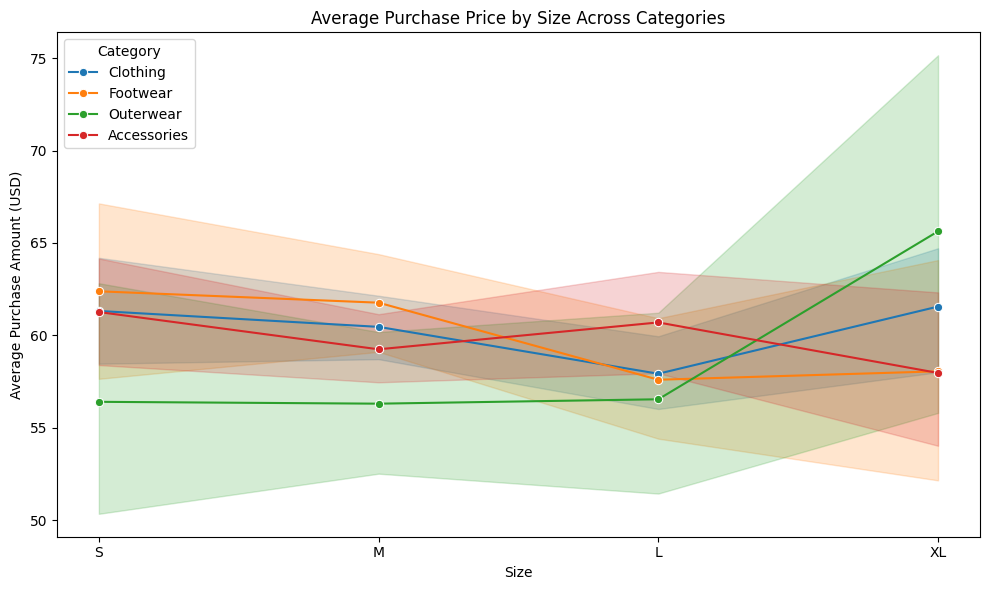

In [ ]:
plt.figure(figsize=(10, 6))
shop_data['Size'] = pd.Categorical(shop_data['Size'], categories=['S', 'M', 'L', 'XL'], ordered=True)

#creates lineplot - average of each category is automatically calculated
sns.lineplot(data=shop_data, x='Size', y='Purchase Amount (USD)', hue='Category', marker='o')
plt.title('Average Purchase Price by Size Across Categories')
plt.xlabel('Size')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Category', loc='upper left')
plt.tight_layout()
plt.show()

Alright! We can see that outerwear prices spike up when the size changes from L to XL, while otherwise, prices stay pretty constant across size (but outerwear usually costs less in sizes S, M, and L). 

Next, I'm asking question 3: How does the age of purchasers vary across different categories of items purchased? I'm answering this with a box-and-whisker plot.

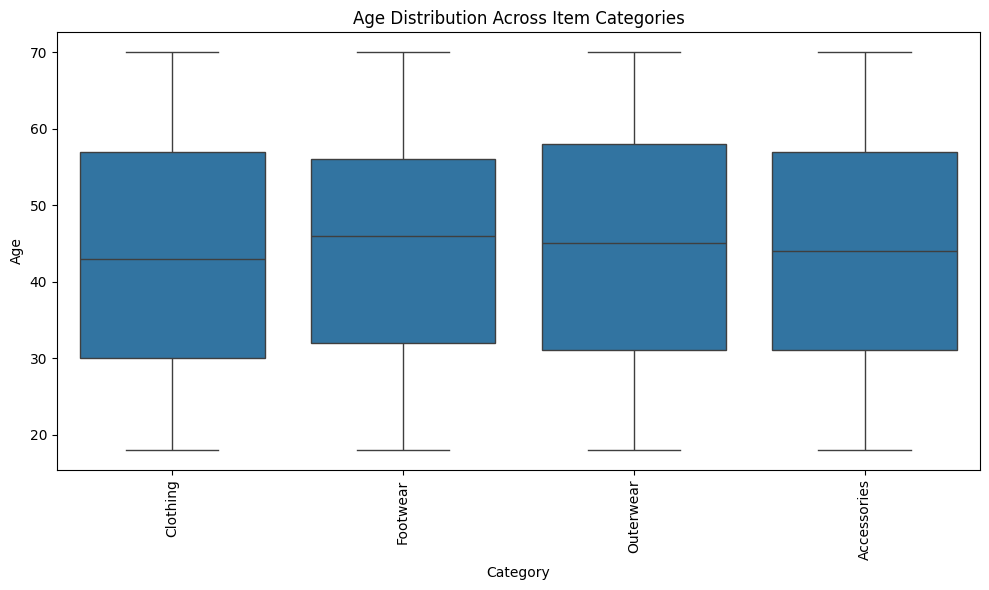

In [ ]:
#set up boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=shop_data, x='Category', y='Age')

#title and axis formatting
plt.xticks(rotation=90)
plt.title('Age Distribution Across Item Categories')
plt.tight_layout()
plt.show()

We can see that the age distribution is pretty even across each category in terms of range - the average age per category is pretty similar, too, with footwear buyers being, on average, a little older. However, this doesn't seem enough to be significant. 

Last, I'm asking question 4: How does size purchased of items change across the year?
We're answering this with a stacked bar chart.

<Figure size 1000x600 with 0 Axes>

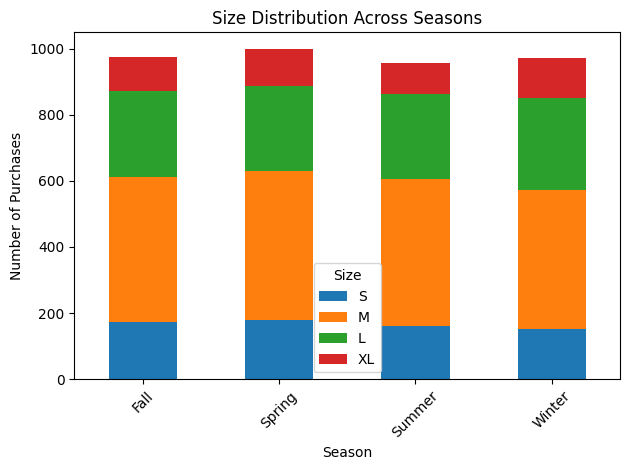

In [ ]:
#group data properly
size_season_counts = shop_data.groupby('Season')['Size'].value_counts().unstack(fill_value=0)

# create chart
plt.figure(figsize=(10, 6))
size_season_counts.plot(kind='bar', stacked=True)

#formatting
plt.title('Size Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.tight_layout()
plt.show()

We can see that the distribution of sizes is pretty equal across seasons!

Looking at our distribution and results, we've found some interesting things, but this raises questions about our sampling. This sampling seems intentionally even for all of these results - which may raise questions of sampling bias - have the proportions of the data veen messed up in order to create equal categories?

That's the end of this notebook! Email or Teams message me with any questions.